# Modelos no supervisados

## KMeans

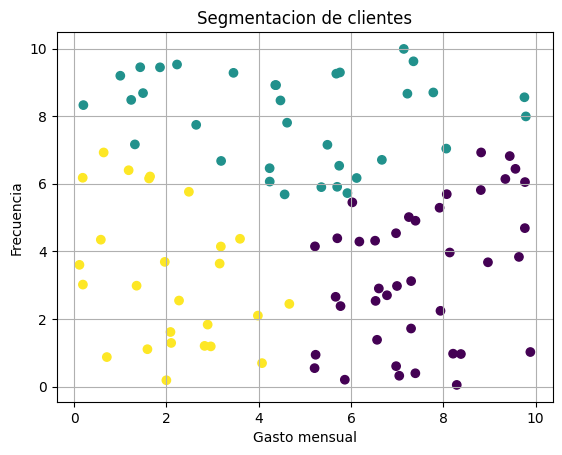

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.random.rand(100, 2) * 10

km = KMeans(n_clusters = 3, random_state = 42)

km.fit(X)

etiquetas = km.labels_
centroides = km.cluster_centers_

plt.scatter(X[:,0], X[:,1], c = etiquetas, cmap = 'viridis')
plt.xlabel('Gasto mensual')
plt.ylabel('Frecuencia')
plt.title('Segmentacion de clientes')
plt.grid()
plt.show()

### Como saber el numero de clusters? Metodo del codo y metodo de la silueta

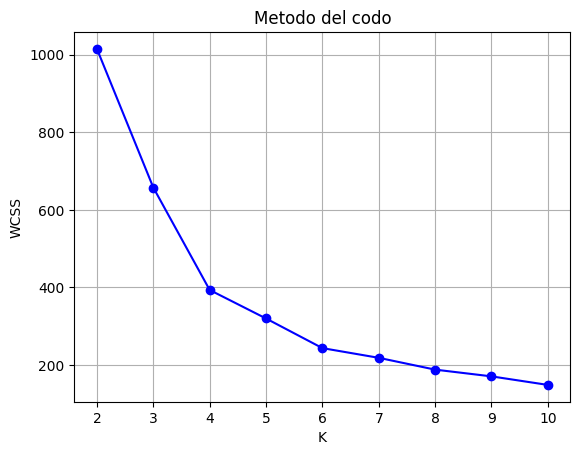

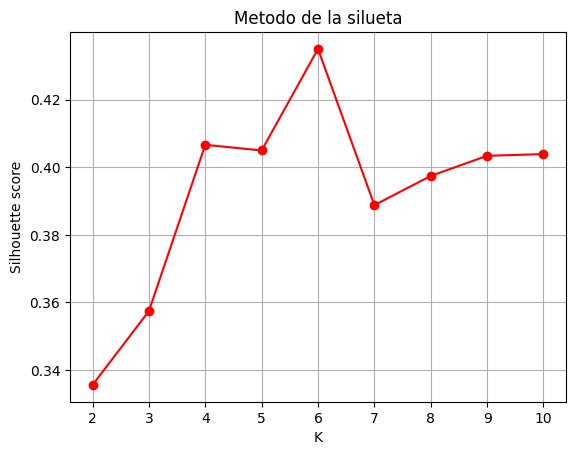

In [2]:
from sklearn.metrics import silhouette_score

wcss = []
silhouettes_scores = []
k_range = range(2, 11)

for k in k_range:
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(X)
  wcss.append(km.inertia_)
  silhouettes_scores.append(silhouette_score(X, km.labels_))

#Se busca el codo
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Metodo del codo')
plt.grid()
plt.show()

#Se busca maximizar el scoring
plt.plot(k_range, silhouettes_scores, 'ro-')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.title('Metodo de la silueta')
plt.grid()
plt.show()

## DBSCAN

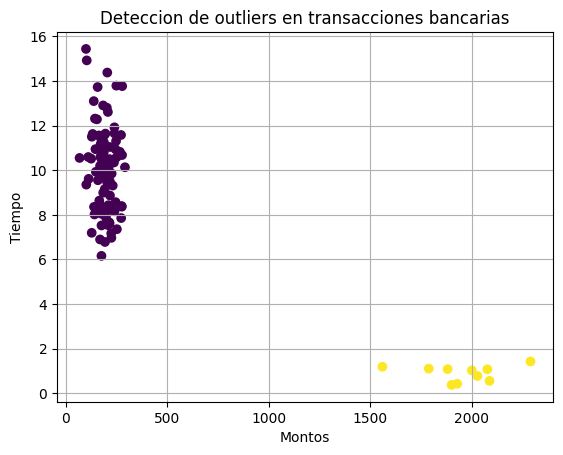


Outliers

          Monto    Tiempo
90  2029.123265  0.776743
91  2290.593497  1.428199
92  1789.384072  1.107047
93  1901.701356  0.377131
94  1882.367554  1.086590
95  1560.945516  1.192659
96  2088.836083  0.558071
97  2078.316582  1.076863
98  2001.534037  1.029104
99  1929.623860  0.428515


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

np.random.seed(42)

data = {'Monto': np.concat([np.random.normal(200, 50, 90), np.random.normal(2000, 300, 10)]),
        'Tiempo': np.concat([np.random.normal(10, 2, 90), np.random.normal(1, 0.5, 10)])}

df = pd.DataFrame(data)

ss = StandardScaler()
df_scaled = ss.fit_transform(df)

dbscan = DBSCAN(eps = 0.5, min_samples = 5)

etiquetas = dbscan.fit_predict(df_scaled)

plt.scatter(df['Monto'], df['Tiempo'], c = etiquetas, cmap = 'viridis')
plt.xlabel('Montos')
plt.ylabel('Tiempo')
plt.title('Deteccion de outliers en transacciones bancarias')
plt.grid()
plt.show()

outliers = df[etiquetas == 1]
print('\nOutliers\n')
print(outliers)

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [6]:
import os
import pandas as pd

os.listdir(path)

dataset_path = os.path.join(path, 'Mall_Customers.csv')

df = pd.read_csv(dataset_path)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


In [9]:
df.shape

(200, 5)

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [12]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df2 = df.copy()
df2 = df2.drop(columns = ['CustomerID'])

In [15]:
df2['Gender'] = df2['Gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [16]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

X = df2[features].copy()
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [17]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

X_scaled[:5]

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992]])

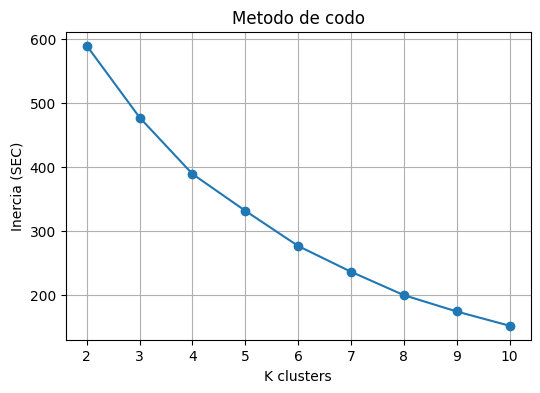

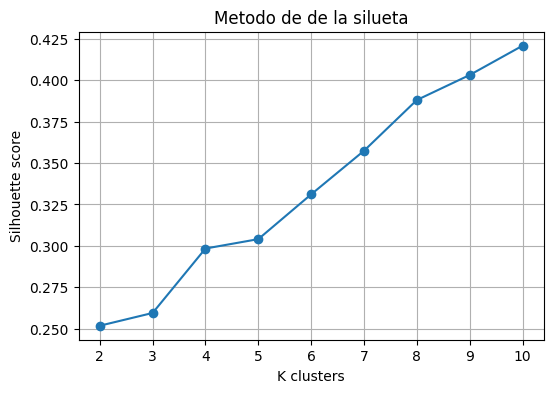

In [27]:
from ast import arg
inercia = []

ks = range(2, 11)

for k in ks:
  km = KMeans(n_clusters = k, random_state = 42, n_init = 10)
  km.fit(X_scaled)
  inercia.append(km.inertia_)

plt.figure(figsize = (6, 4))
plt.plot(list(ks), inercia, marker = 'o')
plt.xlabel('K clusters')
plt.ylabel('Inercia (SEC)')
plt.title('Metodo de codo')
plt.grid()
plt.show()

silhouette_scores = []

for k in ks:
  km = KMeans(n_clusters = k, n_init = 10, random_state = 42)
  etiquetas = km.fit_predict(X_scaled)
  sil = silhouette_score(X_scaled, etiquetas)
  silhouette_scores.append(sil)

plt.figure(figsize = (6, 4))
plt.plot(list(ks), silhouette_scores, marker = 'o')
plt.xlabel('K clusters')
plt.ylabel('Silhouette score')
plt.title('Metodo de de la silueta')
plt.grid()
plt.show()

best_k_sil = ks[int(np.argmax(silhouette_scores))]
best_k_sil, max(silhouette_scores)

#k_optimo = int(best_k_sil)
k_optimo = 4
km = KMeans(n_clusters = k_optimo, random_state = 42, n_init = 10)
etiquetas = km.fit_predict(X_scaled)
df_km = df2.copy()
df_km['Cluster'] = etiquetas
centroides = km.cluster_centers_

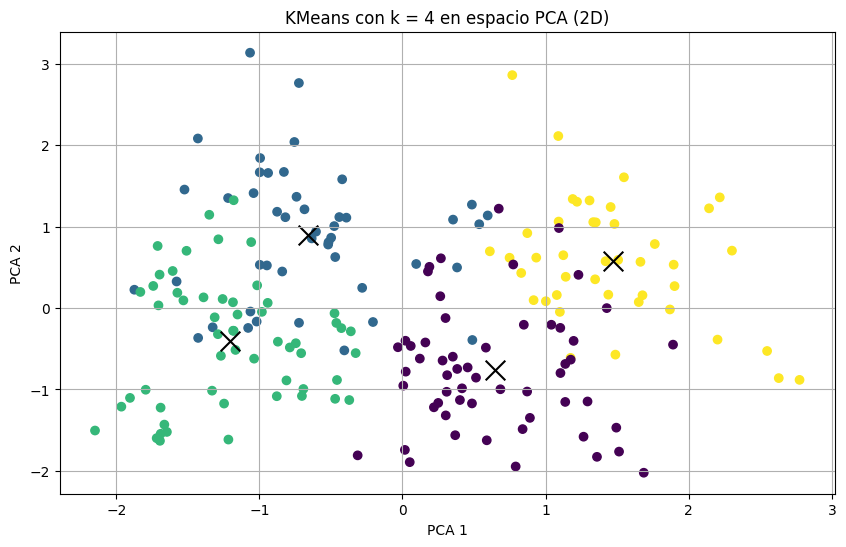

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X_scaled)
centroides_pca = pca.transform(centroides)

plt.figure(figsize = (10, 6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c = etiquetas, cmap = 'viridis')
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker = 'x', s = 200, color = 'black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'KMeans con k = {k_optimo} en espacio PCA (2D)')
plt.grid()
plt.show()

In [36]:
perfil = (df_km.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] +
 (['Gender'] if 'Gender' in df_km.columns else [])].agg(['count','mean','median','min','max']).round(2))
perfil

Age                       Annual Income (k$)                         \
        count   mean median min max              count   mean median min  max   
Cluster                                                                         
0          56  47.80   48.0  20  68                 56  58.07   55.5  16  126   
1          46  28.00   28.0  18  40                 46  62.24   65.5  15  137   
2          56  28.39   29.5  18  40                 56  60.43   62.5  16  120   
3          42  52.74   52.5  32  70                 42  62.21   62.0  19  137   

        Spending Score (1-100)                       Gender                  \
                         count   mean median min max  count mean median min   
Cluster                                                                       
0                           56  34.88   39.5   5  59     56  1.0    1.0   1   
1                           46  64.83   68.5   5  97     46  0.0    0.0   0   
2                           56  68.18   73.0  29  99     56  1.0    1.0   1   
3                           42  30.64   35.5   1  60     42  0.0    0.0   0   

             
        max  
Cluster      
0         1  
1         0  
2         1  
3         0

In [37]:
sil_final = silhouette_score(X_scaled, etiquetas)
sil_final

np.float64(0.2983972818544038)

In [38]:
dbsacn = DBSCAN(eps = 0.9, min_samples = 5)
etiquetas_dbscan = dbsacn.fit_predict(X_scaled)
df_dbscan = df2.copy()
df_dbscan['DBSCAN'] = etiquetas_dbscan
df_dbscan['DBSCAN'].value_counts().sort_index()

,count
DBSCAN,
-1,13
0,77
1,110


In [39]:
mask = etiquetas_dbscan != -1
if sum(mask) > 0 and len(np.unique(etiquetas_dbscan[mask])) > 1:
  sil_dbscan = silhouette_score(X_scaled[mask], etiquetas_dbscan[mask])
else:
  sil_dbscan = np.abs
sil_dbscan

np.float64(0.2918134127162743)

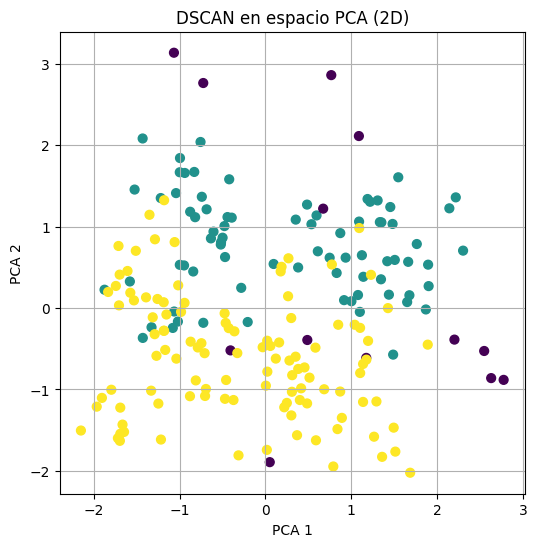

In [40]:
X_dbscan_pca = pca.fit_transform(X_scaled)

plt.figure(figsize = (6, 6))
plt.scatter(X_dbscan_pca[:,0], X_dbscan_pca[:,1], c = etiquetas_dbscan, cmap = 'viridis', s = 40)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DSCAN en espacio PCA (2D)')
plt.grid()
plt.show()

In [43]:
np.random.seed(0)

data = np.random.rand(100, 4) * 100
columnas = ['Gastos_anual', 'Frecuencia_visita', 'Edad', 'Promedio_sesion']

df = pd.DataFrame(data, columns = columnas)
ss = StandardScaler()
df_scaled = ss.fit_transform(df)
pca = PCA(n_components = 2)
componentes_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(componentes_pca, columns = ['PC_1', 'PC_2'])

print('Varianza explicada por cada componente:\n')
print(pca.explained_variance_ratio_)
print('Varianza total explicada:\n')
print(np.sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente:

[0.31745929 0.25894296]
Varianza total explicada:

0.5764022493792267


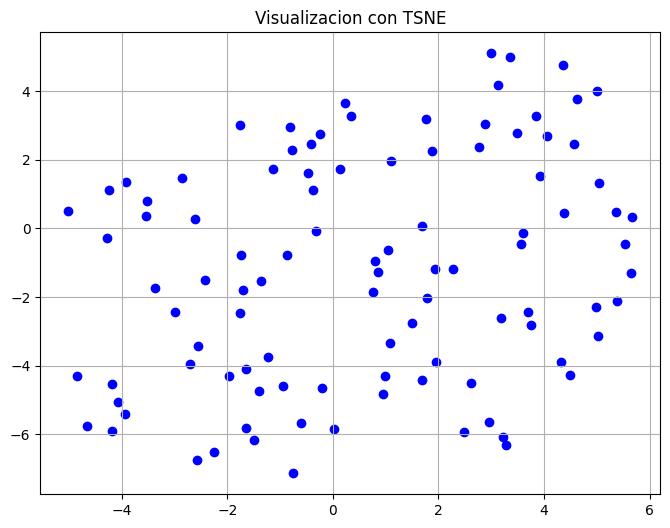

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)
df_tsne = tsne.fit_transform(df_scaled)

plt.figure(figsize = (8, 6))
plt.scatter(df_tsne[:,0], df_tsne[:,1], color = 'blue')
plt.title('Visualizacion con TSNE')
plt.grid()
plt.show()

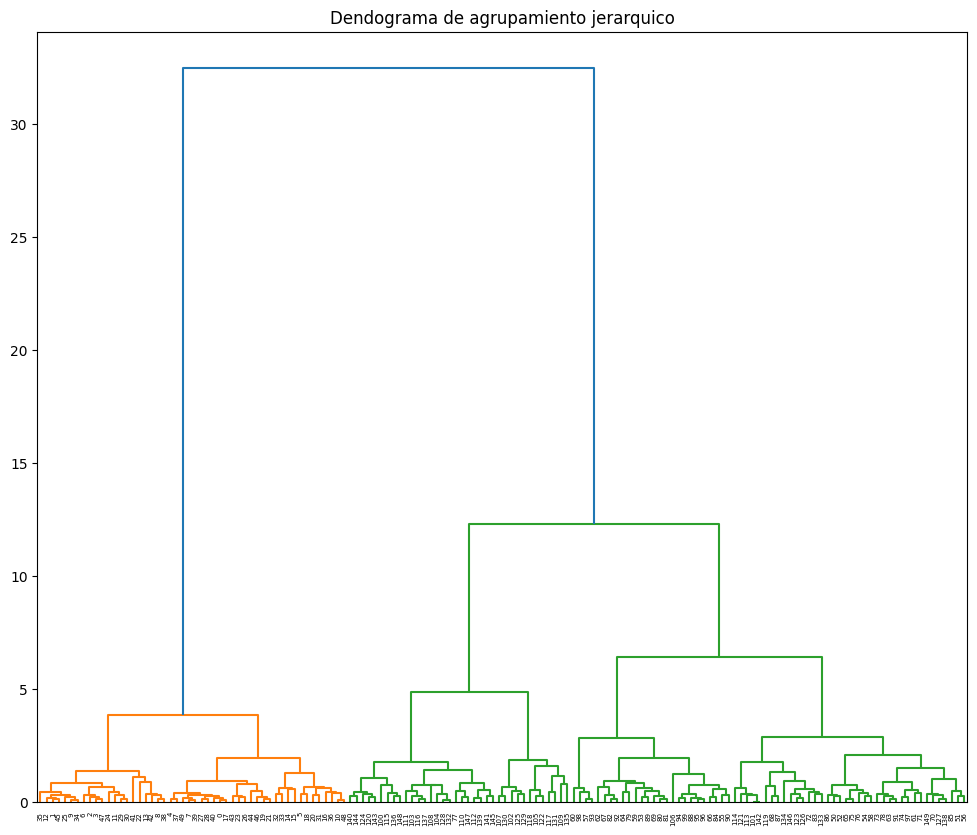

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

z = linkage(X, method = 'ward')

plt.figure(figsize = (12, 10))
dendrogram(z)
plt.title('Dendograma de agrupamiento jerarquico')
plt.show()